# Community detection

- Girvan–Newman algorithm
- Telecom Data

## Communities

**Network communities** are groups of nodes such that vertices inside the
group connected with many more edges than between groups.


## What makes a community? 

What makes a community (cohesive subgroup):
- Mutuality of ties. Almost everyone in the group has ties (edges) to one another
- Compactness. Closeness or reachability of group members in small number of steps, not necessarily adjacency
- Density of edges. High frequency of ties within the group
- Separation. Higher frequency of ties among group members comparedto non-members

## The idea

**Graph Density:**

$$\rho=\frac{m}{n(n-1)/2}$$

**Community Internal Density:**

$$\delta_{int}=\frac{m_s}{n_s(n_s-1)/2}$$


**Esternal Density:**

$$\delta_{ext}=\frac{m}{n(n-1)}$$



$$\delta_{int}>\rho, \text{ } \delta_{ext}<\rho$$

## Loading packages

In [2]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt

In [3]:
## Reading the data

In [4]:
G = nx.read_edgelist("data/community.txt",create_using=nx.Graph(), nodetype = int)

In [138]:
## Information about graph

NotAPartition: Graph with 12 nodes and 17 edges is not a valid partition of the graph [({1, 2, 3, 4, 5}, {6, 7, 8, 9, 10, 11, 12}), ({1, 2, 3, 4, 5}, {8, 9, 6, 7}, {10, 11, 12}), ({1, 2, 3, 5}, {4}, {8, 9, 6, 7}, {10, 11, 12}), ({1, 3, 5}, {2}, {4}, {8, 9, 6, 7}, {10, 11, 12}), ({1}, {2}, {3, 5}, {4}, {8, 9, 6, 7}, {10, 11, 12}), ({1}, {2}, {3}, {4}, {5}, {8, 9, 6, 7}, {10, 11, 12}), ({1}, {2}, {3}, {4}, {5}, {6}, {8, 9, 7}, {10, 11, 12}), ({1}, {2}, {3}, {4}, {5}, {6}, {7}, {8, 9}, {10, 11, 12}), ({1}, {2}, {3}, {4}, {5}, {6}, {7}, {8}, {9}, {10, 11, 12}), ({1}, {2}, {3}, {4}, {5}, {6}, {7}, {8}, {9}, {10}, {11, 12}), ({1}, {2}, {3}, {4}, {5}, {6}, {7}, {8}, {9}, {10}, {11}, {12})]

In [139]:
print(nx.info(G))

Graph with 12 nodes and 17 edges


C:\Users\user\AppData\Local\Temp\ipykernel_15976\2606185536.py:1: DeprecationWarning: info is deprecated and will be removed in version 3.0.

  print(nx.info(G))


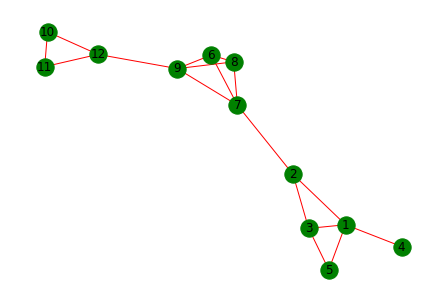

In [56]:
nx.draw(G, with_labels=True,  node_color='g', edge_color='red')

In [78]:
from operator import itemgetter
edge_dict = G.edges()

edge_dict


edge_betweenness = nx.edge_betweenness_centrality(G).items()

# color_map = ['red' if edge in  edges else 'green' for edge in G]


# plt.show()

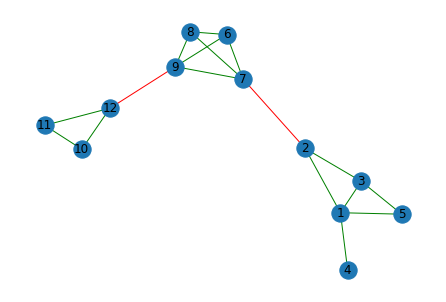

In [96]:
edge_betwenness = nx.edge_betweenness_centrality(G).items()
top3_eb=sorted(edge_betwenness, key=lambda pair: pair[1],reverse=True)[0:2]

top3_edges=[i[0] for i in top3_eb]

color_map = ['red' if edge in  top3_edges else 'green' for edge in edge_dict]


nx.draw(G,edge_color=color_map, with_labels=True)

## Girvan–Newman algorithm

### Edge betweenness

Betweenness centrality of an edge  is the sum of the fraction of all-pairs shortest paths that pass through **e** edge

$$c_B(e)=\sum_{s,t}\frac{\sigma(s,t|e)}{\sigma(s,t)}$$

where 

- $\sigma(s,t)$: the number of shortest (s,t) paths
- $\sigma(s,t|e)$: number of those paths passing through edge **e**


In [36]:
edge_betwenness = nx.edge_betweenness_centrality(G).items()
top3=sorted(edge_betwenness, key=lambda pair: pair[1], reverse=True)[0:3]


SyntaxError: invalid syntax (648477492.py, line 1)

### Spliting into communities

If an edge has very high edge betweennes, it means that edge is necessary to link set of nodes with the rest of the nodes

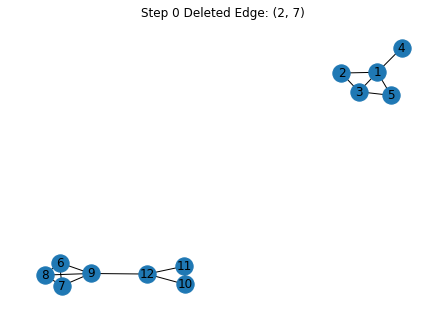

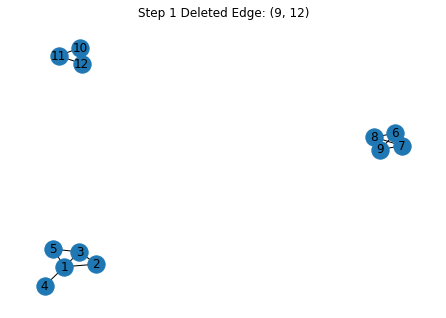

In [5]:
community_size=2

for i in range(community_size):
    edge_betweenness = nx.edge_betweenness_centrality(G).items()
    edge_to_delete = sorted(edge_betweenness, key=lambda pair: -pair[1])[0][0]
    
    G.remove_edge(*edge_to_delete)
    
    nx.draw(G, with_labels=True)
    plt.title("Step {0} Deleted Edge: {1}".format(i, edge_to_delete, fontsize=20))
    
    plt.show()
    

## Telecom Data

Note, here we are using `DiGraph()` as we are dealling with directed network.

In [230]:
G = nx.read_edgelist("data/phonecalls.edgelist.txt",create_using=nx.DiGraph(), nodetype = int)

In [231]:
print(nx.info(G))

DiGraph with 36595 nodes and 91826 edges


C:\Users\user\AppData\Local\Temp\ipykernel_15976\2606185536.py:1: DeprecationWarning: info is deprecated and will be removed in version 3.0.

  print(nx.info(G))


In [232]:
# density 
nx.density(G)

6.856998135013894e-05

C:\Users\user\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


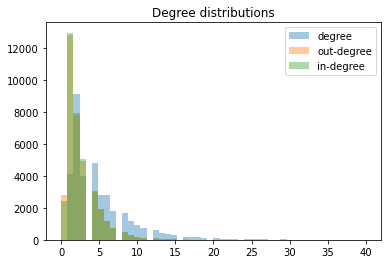

In [233]:
import seaborn as sns
def plot_degree_dist(G):
    degrees = [G.degree(n) for n in G.nodes()]
    in_degrees=[G.in_degree(n) for n in G.nodes()]
    out_degrees=[G.out_degree(n) for n in G.nodes()]
    sns.distplot(degrees,  kde=False, label='Degree',  hist_kws={"range": [0,40]})
    sns.distplot(in_degrees,  kde=False, label='In-Degree',hist_kws={"range": [0,40]})
    sns.distplot(out_degrees,  kde=False, label='Out-Degree',hist_kws={"range": [0,40]})
    plt.legend(['degree', 'out-degree', 'in-degree'])
    plt.title('Degree distributions')
    plt.show()

plot_degree_dist(G)

In [234]:
import matplotlib.colors as colors
from infomap import Infomap

In [235]:
def findCommunities(G):
    """
    Partition network with the Infomap algorithm.
    Annotates nodes with 'community' id and return number of communities found.
    """
    im = Infomap("--two-level --directed")

    print("Building Infomap network from a NetworkX graph...")
    for e in G.edges():
        im.addLink(*e)

    print("Find communities with Infomap...")
    im.run();

    print("Found {0} communities with codelength: {1}".format(im.num_top_modules, im.codelength))

    communities = {}
    for node in im.tree:
#         print(node.node_id, node.module_id)
        communities[node.node_id] = node.module_id
#         print(communities)
    nx.set_node_attributes(G, communities,'community')
    return im.num_top_modules



In [236]:
findCommunities(G)

Building Infomap network from a NetworkX graph...
Find communities with Infomap...
Found 6013 communities with codelength: 5.795101556210718


6013

## Observing communities
Let's take a random community and build a subgraph  from the nodes:

In [237]:
selected_data = dict( (n,d['community']) for n,d in G.nodes().items() if d['community'] == 8)
sg=G.subgraph(list(selected_data.keys()))

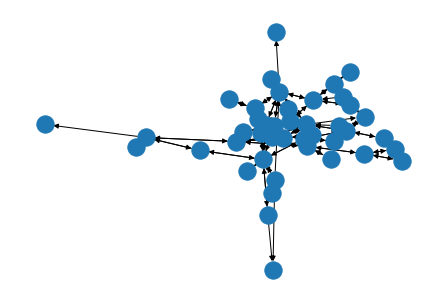

In [238]:
nx.draw(sg)

In [122]:
print("Graph Info: {}".format(nx.info(G)))
print("Subgraph Info: {}".format(nx.info(sg)))

Graph Info: DiGraph with 36595 nodes and 91826 edges
Subgraph Info: DiGraph with 71 nodes and 319 edges


C:\Users\user\AppData\Local\Temp\ipykernel_15976\1157936219.py:1: DeprecationWarning: info is deprecated and will be removed in version 3.0.

  print("Graph Info: {}".format(nx.info(G)))
C:\Users\user\AppData\Local\Temp\ipykernel_15976\1157936219.py:2: DeprecationWarning: info is deprecated and will be removed in version 3.0.

  print("Subgraph Info: {}".format(nx.info(sg)))


In [182]:
print(" Graph Density:{0},\n Subgraph Density: {1},\n Number of times:{2} ".format(nx.density(G), 
                                                                                   nx.density(sg),
                                                                                   nx.density(sg)/nx.density(G)))

 Graph Density:6.856998135013894e-05,
 Subgraph Density: 0.0641851106639839,
 Number of times:936.0526195309202 


## Visualizng for karete club


In [183]:
g=nx.karate_club_graph()

In [184]:
def drawNetwork(G):
    # position map
    pos = nx.spring_layout(G)
    # community ids
    communities = [v for k,v in nx.get_node_attributes(G, 'community').items()]
    numCommunities = max(communities) + 1
    # setting colors
    cmapLight = colors.ListedColormap(['#a6cee3', '#b2df8a', '#fb9a99', '#fdbf6f', '#cab2d6'], 'indexed', numCommunities)
    cmapDark = colors.ListedColormap(['#1f78b4', '#33a02c', '#e31a1c', '#ff7f00', '#6a3d9a'], 'indexed', numCommunities)

    # edges
    nx.draw_networkx_edges(G, pos)

    # nodes
    nodeCollection = nx.draw_networkx_nodes(G,
        pos = pos,
        node_color = communities,
        cmap = cmapLight)
    # set node border color to the darker shade
    darkColors = [cmapDark(v) for v in communities]
    nodeCollection.set_edgecolor(darkColors)

    # Print node labels separately instead
    for n in G.nodes():
        plt.annotate(n,
            xy = pos[n],
            textcoords = 'offset points',
            horizontalalignment = 'center',
            verticalalignment = 'center',
            xytext = [0, 2],
            color = cmapDark(communities[n]))

    plt.axis('off')
    plt.show()

Building Infomap network from a NetworkX graph...
Find communities with Infomap...
Found 5 modules with codelength: 2.753094
Number of communities found: 5


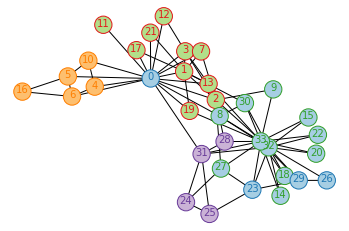

In [185]:
numCommunities = findCommunities(g)

print("Number of communities found: %d" % numCommunities)

drawNetwork(g)

## Applications in Marketing

1. Calculating Eigen Vector Centrality over time: Churn indicator
2. Detecting Communities and the influencers within a communities <br><br>
  2.1. Spreading information with minimum targeting cost <br>
  2.2. Testing new product feature and/or new product within a small community and/or the most relevant one <br>
  2.3. Retention campaigns<br>
3. Network parameters can be used as **features for other ML models**

In [267]:
betweenness_dict = nx.betweenness_centrality(sg)
nx.set_node_attributes(sg, betweenness_dict, 'betweenness')
sorted_betweenness = sorted(betweenness_dict.items(), key=itemgetter(1), reverse=True)

top3b=[tup[0] for tup in  sorted_betweenness[:3]]

closeness_dict = nx.closeness_centrality(sg)
nx.set_node_attributes(sg, closeness_dict, 'closeness')
sorted_closeness = sorted(closeness_dict.items(), key=itemgetter(1), reverse=True)

top3c=[tup[0] for tup in  sorted_betweenness[:3]]


top3=list(set(top3c) & set(top3b))

color_map= ['red' if node in  top3 else 'green' for node in sg]




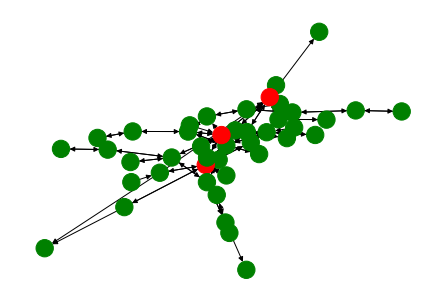

In [268]:
nx.draw(sg, node_color=color_map)

{208: Text(0.06581848632446749, 0.2069235516378553, '208'),
 97: Text(-0.010474676517254691, -0.0879722893269279, '97'),
 248: Text(0.145000982350881, -0.33118533171284265, '248')}

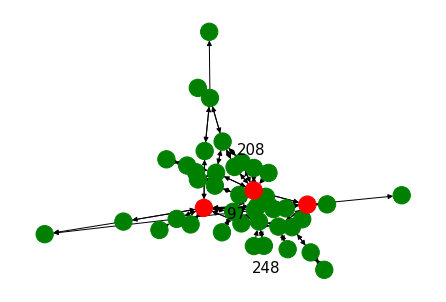

In [266]:
labels={}
pos = nx.spring_layout(sg, seed=5656)  # positions for all nodes
for i in sg.nodes():
    if i in  top3:
        labels[i]=str(i)


nx.draw(sg, node_color=color_map)
nx.draw_networkx_labels(G,pos,labels,font_size=15,font_color='black')

In [257]:

# nx.draw(sg1)
# plt.show()

sg1.nodes()
labels

{208: '208', 97: '97', 248: '248'}